# Basic Iterative Method

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import models
from torchvision import transforms

plt.rcParams['figure.figsize'] = (20.0, 10.0)
from IPython.display import clear_output

# Import helper functions
from modules.helper import *
from modules.dataset import ImageNetSubset
from modules.bim import apply_BIM
from modules.bim import compute_all_bim
from modules.bim import BIM_attack_with_selected_samples

## 1. Load Model and Data

We load the pre-trained googleNet and the data. For details see notebook `00_Helper-Functions`.

In [2]:
## Load model and data
model = models.googlenet(pretrained=True)
model.eval();

In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]   

preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

data_loader = torch.utils.data.DataLoader(
    ImageNetSubset("data/ImageNet_subset//dev_dataset.csv", "data/ImageNet_subset//images/", transform=preprocess))

## 2. Attack

BIM requires the following function, which clips pixel values of an image $X^\prime$:

For the implementation we do for the number of iterations `n`:


a) Compute $ X^\prime = \widetilde{X}_{n} + \alpha sign(\nabla_{X} J(\widetilde{X}_{n}, Y_{true}))$ as used in equation (2.1)

b) Compute $ X(x, y, z) + \epsilon $ and $ X(x, y, z) - \epsilon $

c) Evaluate equation (2.2) using steps a) and b)

$max\{0, X(x, y, z)-\epsilon, X^\prime(x, y, z) \}$ (?)

d) Retrieve updated adversarial image $\widetilde{X}_{1}$ as given in equation (2.1)

Values for the hyper parameters given in [2]:

- $\alpha = \frac{1}{255}$

- Number of iterations: $min(4+\epsilon, 1.25 \cdot \epsilon)$

- $\epsilon $

In [10]:
## TODO: CHECK alpha
def compare_examples_bim(alpha, epsilon, idx, folder=None):
    '''
    Generates an example using BIM. Prints infos and plots clean and adversarial image side-by-side.
    
    Inputs:
    alpha   -- Hyperparameter for BIM
    epsilon -- Hyperparameter for BIM
    idx     -- Index of sample   
    folder  -- If given image will be saved to this folder
    '''
    
    num_iterations = int(np.min([np.ceil(epsilon*255*4), np.ceil(1.25+(epsilon*255))]))
    print("Number of iterations: " + str(num_iterations))
    
    
    # Get data
    image_clean, target_class = data_loader.dataset[idx]
    image_clean.unsqueeze_(0)
    target_class.unsqueeze_(0)

    # Predict clean example
    labels, confidences, gradient = predict(model, image_clean, target_class, return_grad=True)
    label_clean = labels[0]
    conf_clean = confidences[0]
    
    # Compute adversarial image and predict for it.    
    image_adv = apply_BIM(model, mean, std, image_clean, target_class, alpha, epsilon, num_iterations=num_iterations)
    labels, confidences, _ = predict(model, image_adv, target_class, return_grad=False)
    label_adv = labels[0]
    conf_adv = confidences[0]
    
    
    # Plot
    summarize_attack(image_clean, image_adv, conf_clean, conf_adv, label_clean, label_adv, target_class, idx,
                        folder=folder)

### 2.1 Individual Images

Do some cool analysis here. In particularm find one of the examples where a wrong class is predicted with high confidence. Apparently there aren't neccessarily that many in the ImageNet dataset?

## 2. Attack

Number of iterations: 18
			Clean image	 Adversarial image

Actual class: 		barrel, cask			barrel, cask
Predicted class: 	barrel, cask			honeycomb
Confidence: 		99.99%				11.80%



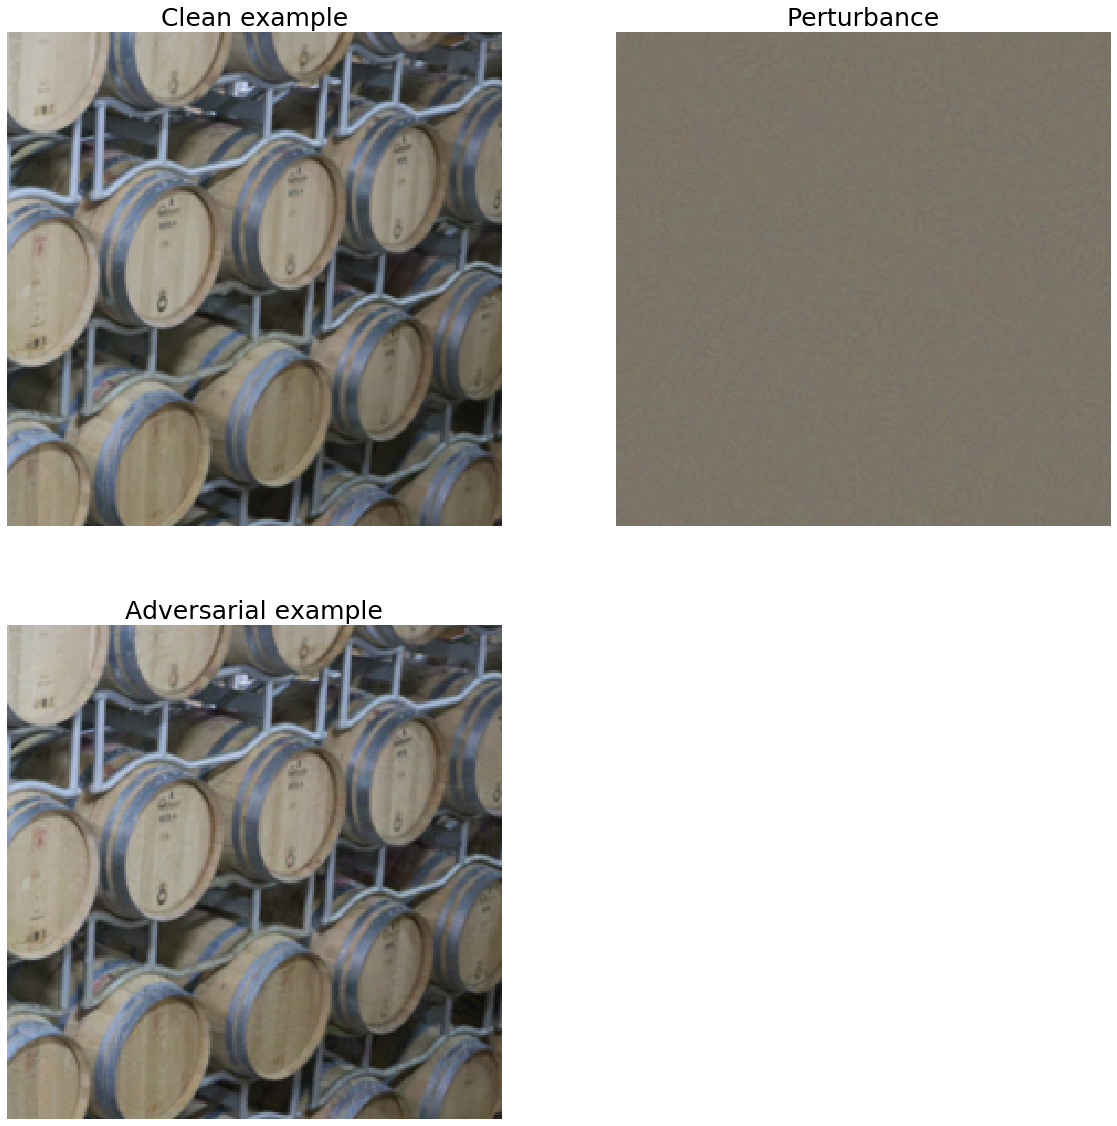

In [11]:
alpha = 1/255
epsilon = 16/255

compare_examples_bim(alpha, epsilon, 766, folder=None)

## 0. Introduction

## 1. All Images

We are splitting the data according to the original confidences. For each of the intervals we craft adversarial examples at varying epsilon and report the confidence and accuracy of these attacks for the interval.


### 1.1 Intervals of initial confidences

use function `BIM_attack_with_selected_samples`

In [ ]:
max_confidence = 0.60
min_confidence = 0.40


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255

result = BIM_attack_with_selected_samples(min_confidence, max_confidence, data_loader, predict, model, mean, std, epsilons, alpha)

In [ ]:
max_confidence = 0.90
min_confidence = 0.85


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255

result = BIM_attack_with_selected_samples(min_confidence, max_confidence, data_loader, predict, model, mean, std, epsilons, alpha)

In [ ]:
max_confidence = 0.95
min_confidence = 0.90


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255

result = BIM_attack_with_selected_samples(min_confidence, max_confidence, data_loader, predict, model, mean, std, epsilons, alpha)

In [ ]:
max_confidence = 0.99
min_confidence = 0.95


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255

result = BIM_attack_with_selected_samples(min_confidence, max_confidence, data_loader, predict, model, mean, std, epsilons, alpha)

In [5]:
max_confidence = 1.00
min_confidence = 0.99


# Hyperparameter for attacks
epsilons = [0, 0.5/255, 1/255, 2/255, 4/255, 10/255, 20/255, 30/255, 40/255, 50/255, 60/255]    
alpha = 1/255

result = BIM_attack_with_selected_samples(min_confidence, max_confidence, data_loader, predict, model, mean, std, epsilons, alpha)

Running for epsilon 60.00
Sample: 39 of 39
Accuracy top 1 adversarial: 0.00
Accuracy top 5 adversarial: 0.00
Confidence adversarial: 0.52
Number of iterations: 62


In [ ]:
### PLOT 1
####### PLOT 3
# Load data
result_99 = pd.read_csv("results/BIM-Conf99.csv")
result_95 = pd.read_csv("results/BIM-Conf95.csv")
result_90 = pd.read_csv("results/BIM-Conf90.csv")
result_85 = pd.read_csv("results/BIM-Conf85.csv") 
result_40 = pd.read_csv("results/BIM-Conf40.csv")

# Plot
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,10))

## Top left: Accuracies
axs[0].plot(result_99["Epsilon_255"], result_99["Accuracy Top 1"], "-^", color='navy', label='99% - 100%')
axs[0].plot(result_95["Epsilon_255"], result_95["Accuracy Top 1"], "-o", color='navy', label='95% - 99%')
axs[0].plot(result_90["Epsilon_255"], result_90["Accuracy Top 1"], "-*", color='navy', label='90% - 95%')
axs[0].plot(result_85["Epsilon_255"], result_85["Accuracy Top 1"], "-s", color='navy', label='85% - 90%')
axs[0].plot(result_40["Epsilon_255"], result_40["Accuracy Top 1"], "-v", color='navy', label='40% - 60%')
axs[0].legend()
#axs[0].set_title("Accuracies", fontsize=25)
axs[0].set_xlabel("Epsilon * 255", fontsize=20)

## Bottom left: Confidences
axs[1].plot(result_99["Epsilon_255"], result_99["Confidence"], "-^", color='orange', label='99% - 100%')
axs[1].plot(result_95["Epsilon_255"], result_95["Confidence"], "-o", color='orange', label='95% - 99%')
axs[1].plot(result_90["Epsilon_255"], result_90["Confidence"], "-*", color='orange', label='90% - 95%')
axs[1].plot(result_85["Epsilon_255"], result_85["Confidence"], "-s", color='orange', label='85% - 90%')
axs[1].plot(result_40["Epsilon_255"], result_40["Confidence"], "-v", color='orange', label='40% - 60%')
axs[1].legend()
#axs[1].set_title("Confidences", fontsize=25)
axs[1].set_xlabel("Epsilon * 255", fontsize=20)

## Save plot
fig.tight_layout()
fig.savefig("plots/BIM/Accuracies_Confidences.pdf")
fig.savefig("plots/BIM/Accuracies_Confidences.png")

## 2. Indivdual Images

In [26]:
## TODO: CHECK alpha
#def get_confidence_acc_class(sample, epsilon, alpha, num_iterations):
    '''
    Computes BIM attack and returns info about success.
    ...
    
    Inputs:
    sample         -- Index of sample 
    epsilon        -- Hyperparameter for BIM
    alpha          -- Hyperparamezer for BIM
    num_iterations -- Number of iterations to perform the BIM with
    
    Returns:
    conf_adv       -- Confidence of adversary
    corr           -- Integer to indicate if predicted class is correct (1) or not (0)
    class_name_adv -- Label of adversarial class
    '''
       
    
    # Get data
    image_clean, class_index = data_loader.dataset[sample]
    image_clean.unsqueeze_(0)
    class_index.unsqueeze_(0)

    # Predict clean example
    _, _, gradient = predict(model, image_clean, class_index, return_grad=True)
              
    # Compute adversarial image and predict for it.
    image_adv = apply_BIM(model, mean, std, image_clean, class_index, alpha, epsilon, num_iterations=num_iterations)    
    predicted_classes, confidences, _ = predict(model, image_adv, class_index, return_grad=False)
    
    
    if predicted_classes[0] == class_index.squeeze().numpy():
        corr_adv = 1
    else: 
        corr_adv = 0
        
    conf_adv = confidences[0] 
    class_name_adv = idx_to_name(predicted_classes[0])
        
    return conf_adv, corr_adv, class_name_adv

In [35]:
## TODO: CHECK alpha
#def analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=None, save_plot=False, print_output=True):
    '''
    Generates 4 plots: Image, conf over epsilon, top 5 conf for clean image, top 5 conf for adversarial image.
    '''  

    # Get data
    image_clean, class_index = data_loader.dataset[sample]
    image_clean.unsqueeze_(0)
    class_index.unsqueeze_(0)

    # Predict clean example
    _, confidences_clean, gradient = predict(model, image_clean, class_index, return_grad=True)
    
    epsilons = [0, 0.1/255, 0.2/255, 0.3/255, 0.4/255, 0.5/255, 0.7/255, 1/255, 2/255, 3/255, 4/255, 5/255, 
                6/255, 8/255, 10/255, 12/255, 14/255, 16/255, 18/255, 20/255]

    conf_list = []
    acc_list = []

    print("Epsilon \t Accuracy \t Confidence \t Label")

    for epsilon in epsilons:
        if num_iterations == None:
            num_iterations = int(np.min([np.ceil(epsilon*255*4), np.ceil(1.25+(epsilon*255))]))
        
        conf_adv, acc, predicted_label = get_confidence_acc_class(sample, epsilon, alpha, num_iterations)
        conf_list.append(conf_adv)
        acc_list.append(acc)
        
        if print_output == True:
            print(str(epsilon*255) + "\t\t\t" + str(acc) + "\t" + str(conf_adv) + "\t" + predicted_label) 
    
    # Compute top 5 confidences for selected epsilon
    ## Number of iterations
    if num_iterations == None:
        num_iterations = int(np.min([np.ceil(epsilon*255*4), np.ceil(1.25+(epsilon*255))]))
    
    image_adv = apply_BIM(model, mean, std, image_clean, class_index, alpha, epsilon_conf, num_iterations=num_iterations)    
    
    _, confidences_adv, _ = predict(model, image_adv, class_index, return_grad=False)
    
     
    # Plot
    samples = [1, 2, 3, 4, 5]
    
    fig, axs = plt.subplots(1, 4, figsize=(20,5))

    ## First image: Clean image
    im = show_tensor_image(image_clean)

    axs[0].imshow(im)
    axs[0].axis('off')

    ## Second image: Confidence dist over epsilon and correct/incorrect
    axs[1].plot(np.array(epsilons)*255, conf_list, "-^", color='orange', label='Confidence')
    axs[1].plot(np.array(epsilons)*255, acc_list, "s", color='navy', label='1: Corr, 0: False')
    axs[1].set_ylim(0, 1.1)
    axs[1].set_xlabel("Epsilon *255", fontsize=10)
    axs[1].legend()

    ## Third image: Clean image top 5 confidence
    axs[2].bar(samples, confidences_clean, color='orange')
    axs[2].set_ylim(0, 1.1)
    axs[2].set_xlabel("Epsilon *255", fontsize=10)

    ## Fourth image: Adversarial image selected epsilon top 5 confidence
    axs[3].bar(samples, confidences_adv, color='orange')
    axs[3].set_ylim(0, 1.1)
    axs[3].set_xlabel("Epsilon *255", fontsize=10)
    
    if save_plot is True:
        fig.tight_layout()
        fig.savefig("plots/BIM/Individual_Images-Sample_" + str(sample) + ".png")

### 2.1 Confidence and correct/false class over epsilon for individual images
Can you find one which:
- Cannot be forced to change the class
- Changes class and then changes back?
- Has higher adversarial confidence than initial confidence

In [ ]:
# All images: Only for correct initial classifiation we compute adversaries.
epsilons = [1/255, 2/255, 4/255, 6/255, 8/255, 10/255]


result = pd.DataFrame()

for epsilon in epsilons:   
    conf = []
    
    for idx in range(1000):
        clear_output(wait=True)
        print("Epsilon " + str(epsilon*255))
        print(idx+1)
        conf_adv, acc, label_adv = get_confidence_acc_class(epsilon, idx)
        
        if acc == 1:
            conf.append(conf_adv)

        else:
            conf.append(0)

    result["Epsilon " + str(int(epsilon*255))] = conf

#result.to_csv("results/BIM-accuracies-corr_only.csv")

In [ ]:
result = pd.read_csv("results/BIM-accuracies-corr_only.csv", index_col=0)
result

#### 2.1.1 Predicted class invariant

#### Increasing interations

In [ ]:
sample = 132
alpha = 1
num_iter = 1
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

# Class doesn't change.
# Confidence incrreases again to almost initial level for higher epsilon. Why? How does it behave for other attack
# methods?

Epsilon 	 Accuracy 	 Confidence 	 Label


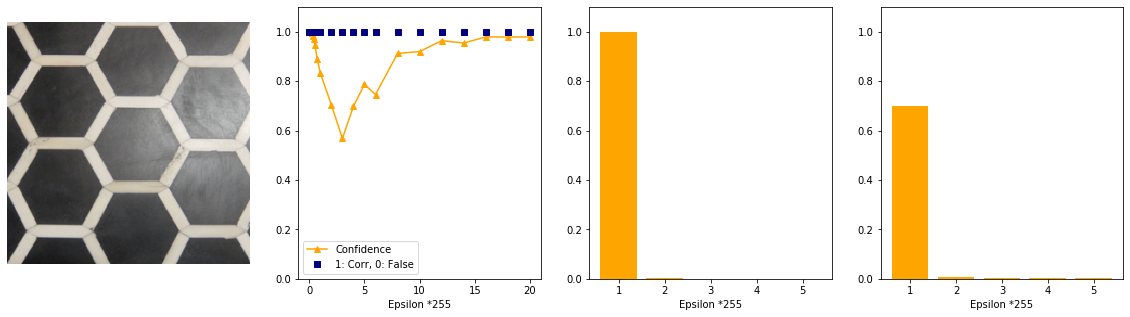

In [42]:
sample = 132
alpha = 1
num_iter = 5
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label


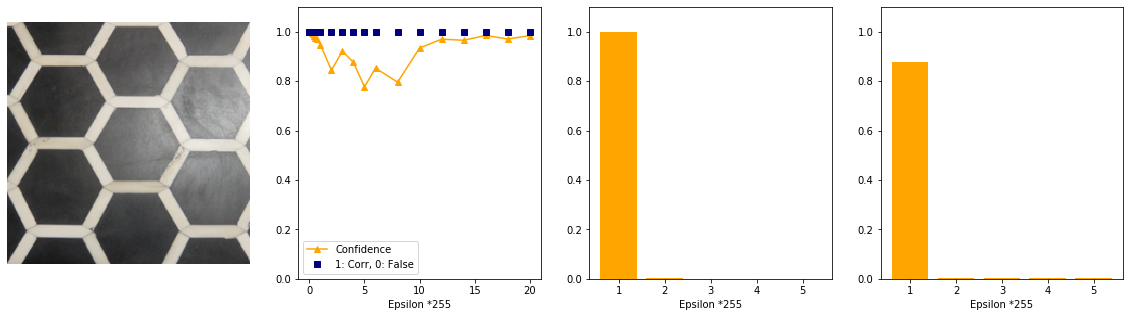

In [37]:
sample = 132
alpha = 1
num_iter = 10
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label


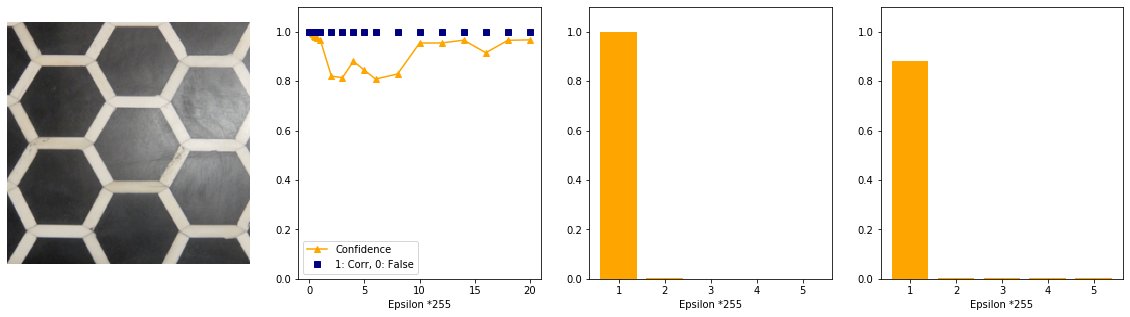

In [44]:
sample = 132
alpha = 1
num_iter = 20
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

#### Lowering alpha

Epsilon 	 Accuracy 	 Confidence 	 Label


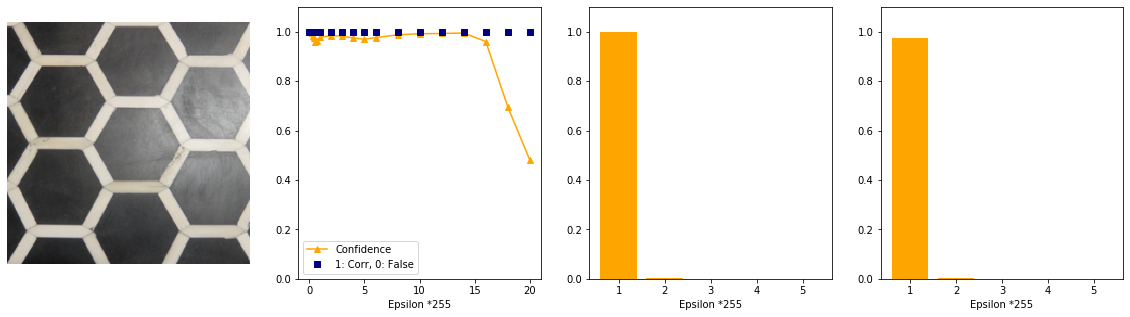

In [48]:
sample = 132
alpha = 127/255
num_iter = 2
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label


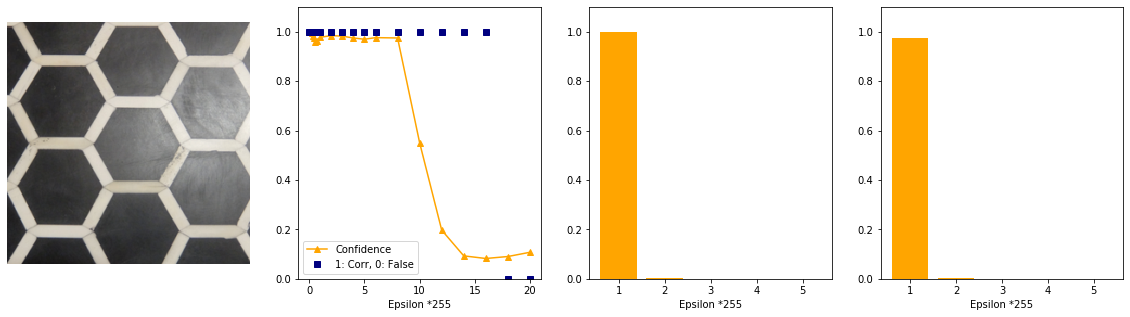

In [49]:
sample = 132
alpha = 68/255
num_iter = 2
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label


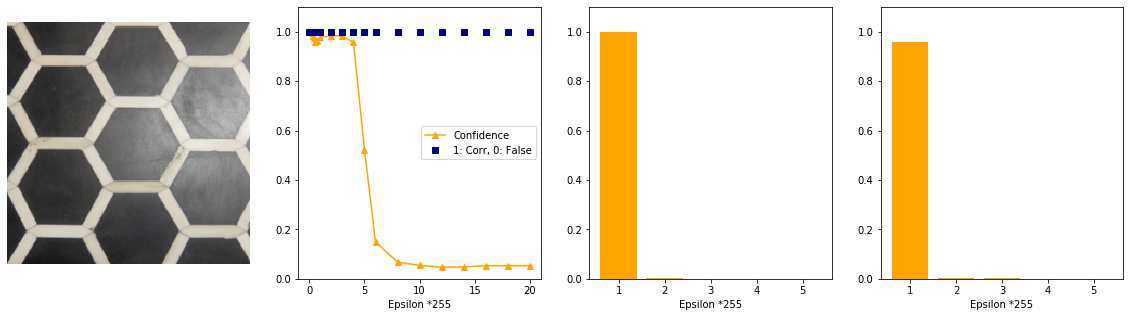

In [50]:
sample = 132
alpha = 34/255
num_iter = 2
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label


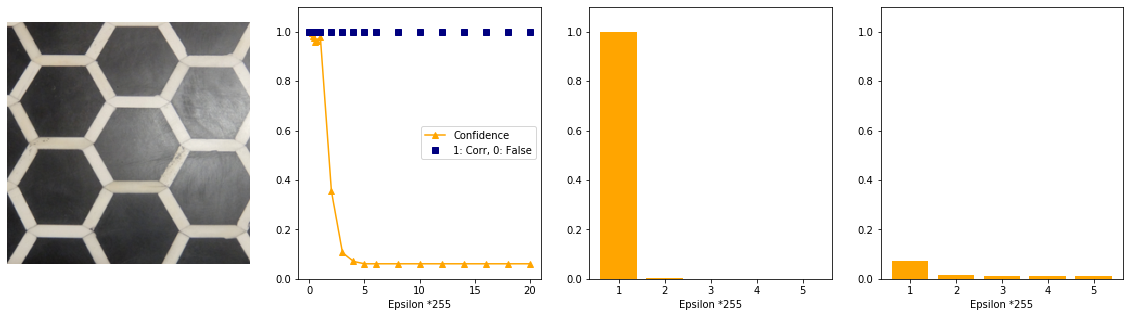

In [51]:
sample = 132
alpha = 10/255
num_iter = 2
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

#### Combining alpha and iterations

Epsilon 	 Accuracy 	 Confidence 	 Label


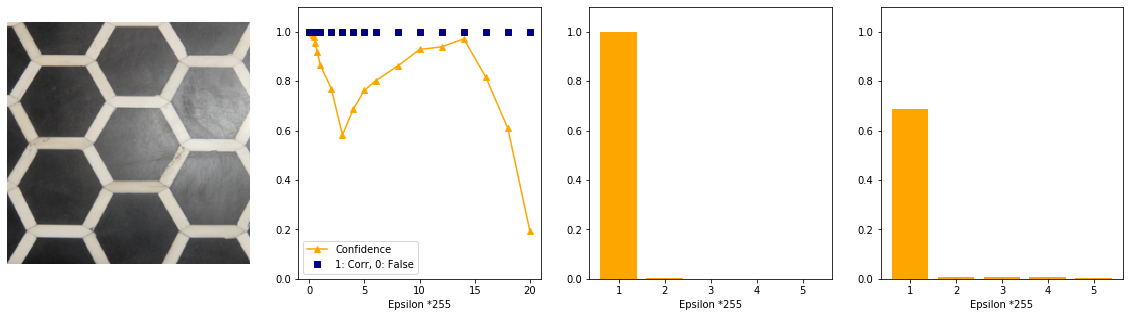

In [52]:
sample = 132
alpha = 127/255
num_iter = 15
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label


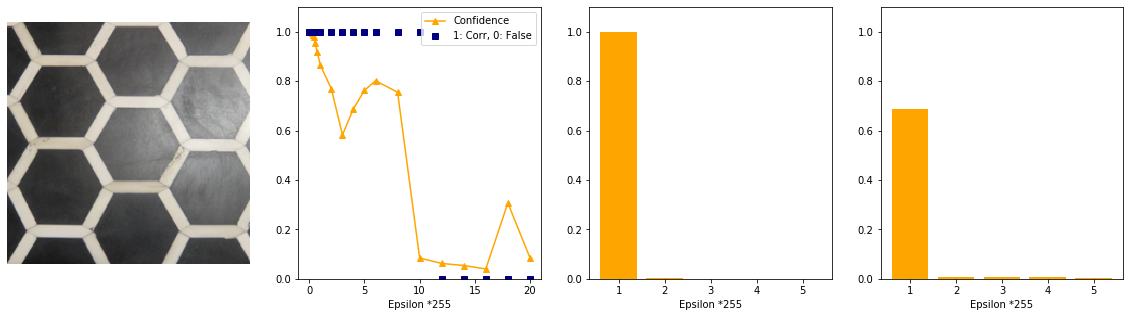

In [53]:
sample = 132
alpha = 68/255
num_iter = 15
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label


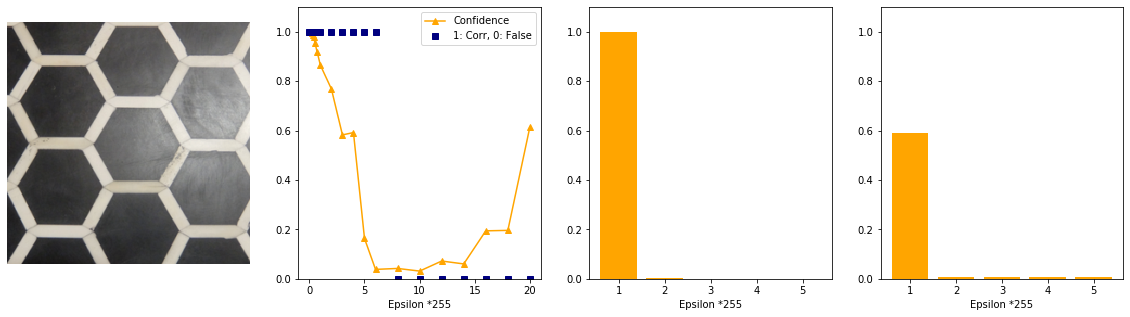

In [54]:
sample = 132
alpha = 34/255
num_iter = 15
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label


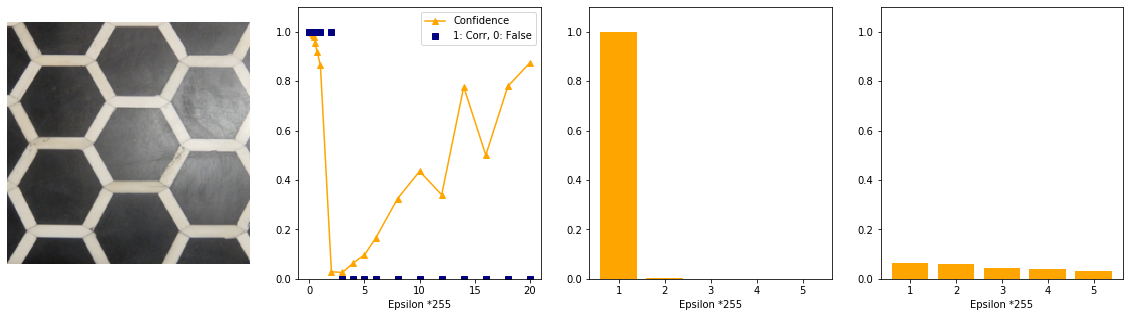

In [56]:
sample = 132
alpha = 10/255
num_iter = 15
epsilon_conf = 4/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

In [ ]:
## Make subplot 3x3




## Apron example

Epsilon 	 Accuracy 	 Confidence 	 Label


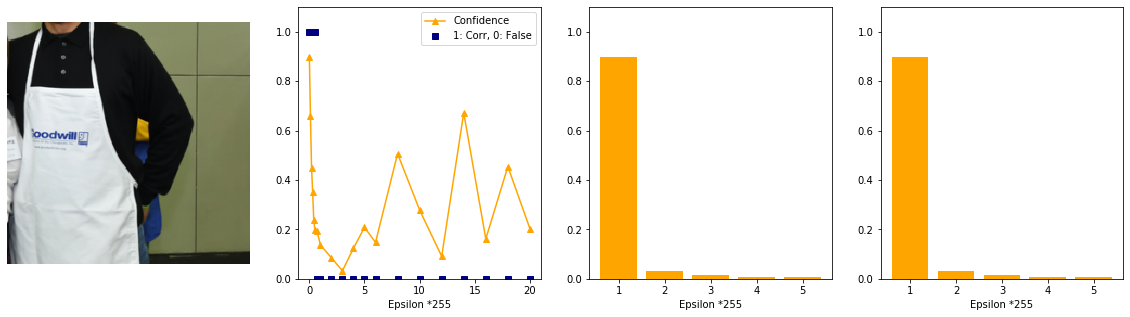

In [57]:
sample = 432
alpha = 10/255
num_iter = 15
epsilon_conf = 0/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

Epsilon 	 Accuracy 	 Confidence 	 Label
0			1	0.8916601	oystercatcher, oyster catcher
0.1			1	0.7187698	oystercatcher, oyster catcher
0.2			1	0.54159766	oystercatcher, oyster catcher
0.3			1	0.41286704	oystercatcher, oyster catcher
0.4			1	0.3320735	oystercatcher, oyster catcher
0.5			1	0.27710265	oystercatcher, oyster catcher
0.7			1	0.21350215	oystercatcher, oyster catcher
1.0			1	0.17391019	oystercatcher, oyster catcher
2.0			1	0.17523277	oystercatcher, oyster catcher
3.0			1	0.2327377	oystercatcher, oyster catcher
4.0			1	0.24756257	oystercatcher, oyster catcher
5.0			1	0.29042226	oystercatcher, oyster catcher
6.0			1	0.37664443	oystercatcher, oyster catcher
8.0			1	0.5575994	oystercatcher, oyster catcher
10.0			1	0.61486965	oystercatcher, oyster catcher
12.0			1	0.61755383	oystercatcher, oyster catcher
14.0			1	0.6292303	oystercatcher, oyster catcher
16.0			1	0.64831513	oystercatcher, oyster catcher
18.0			1	0.6203872	oystercatcher, oyster catcher
20.0			1	0.56275415	oystercatcher

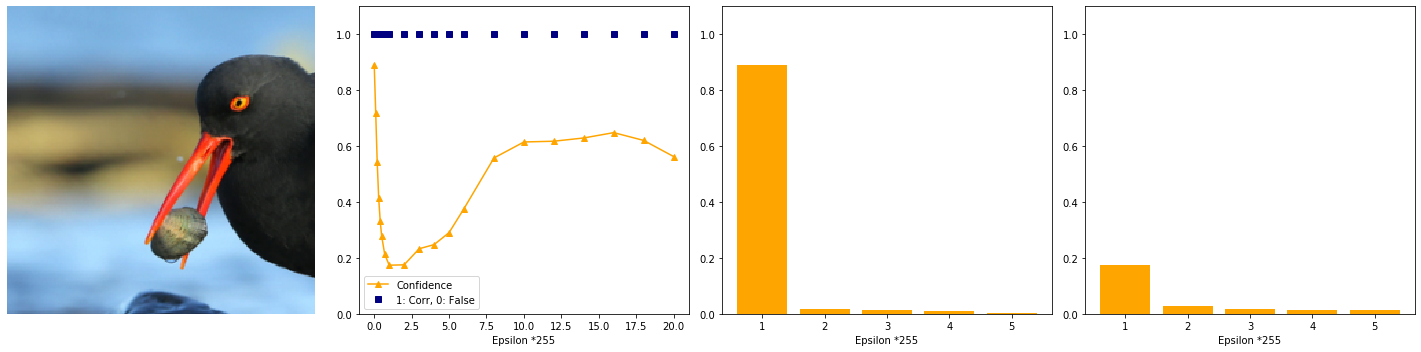

In [11]:
sample = 323
alpha = 10/255
num_iter = 15
epsilon_conf = 2/255
analyze_bim_conf(sample, alpha, epsilon_conf, num_iterations=num_iter, save_plot=False, print_output=False)

#### 2.1.2 Class bounces back

In [12]:
sample = 766
epsilon_conf = 4/255
analyze_bim_conf(sample, epsilon_conf, save_plot=True)

NameError: name 'analyze_fgsm_conf' is not defined

In [ ]:
sample = 766
epsilon_conf = 4/255
analyze_bim_conf(sample, epsilon_conf, save_plot=True)

In [ ]:
sample = 766
epsilon_conf = 5/255
analyze_bim_conf(sample, epsilon_conf, save_plot=False)

In [ ]:
sample = 766
epsilon_conf = 18/255
analyze_bim_conf(sample, epsilon_conf, save_plot=False)

Epsilon 	 Accuracy 	 Confidence 	 Label
0			1	0.89812696	apron
0.1			1	0.64871854	apron
0.2			1	0.46519157	apron
0.3			1	0.38934562	apron
0.4			1	0.34077898	apron
0.5			1	0.32502708	apron
0.7			1	0.27854213	apron
1.0			1	0.26864746	apron
2.0			1	0.10993061	apron
3.0			0	0.10986753	sweatshirt
4.0			1	0.117310785	apron
5.0			0	0.1602098	sweatshirt
6.0			0	0.20489548	sweatshirt
8.0			0	0.36606795	sweatshirt
10.0			0	0.19468589	sweatshirt
12.0			1	0.2728588	apron
14.0			0	0.38190392	sweatshirt
16.0			0	0.38336664	sweatshirt
18.0			0	0.5617563	sweatshirt
20.0			0	0.6086473	sweatshirt


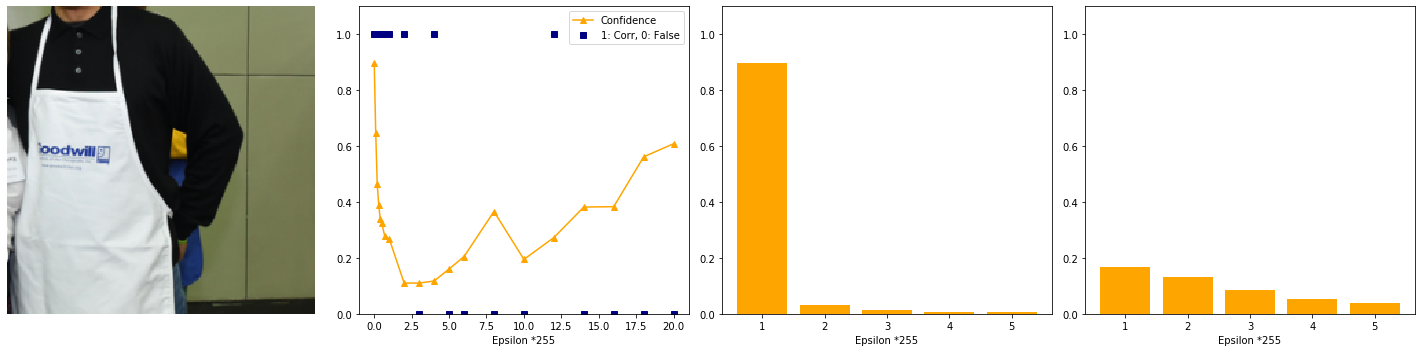

In [32]:
sample = 432
epsilon_conf = 0.5/255
analyze_bim_conf(sample, epsilon_conf, save_plot=True)

#### 2.1.3 Adversarial confidence greater than initial confidence

In [ ]:
#--------> Find more examples!!!!!

Epsilon 	 Accuracy 	 Confidence 	 Label
0			1	0.49230596	umbrella
0.1			0	0.61099654	lionfish
0.2			0	0.7307007	lionfish
0.3			0	0.7762353	lionfish
0.4			0	0.7989121	lionfish
0.5			0	0.80780685	lionfish
0.7			0	0.809179	lionfish
1.0			0	0.79589593	lionfish
2.0			0	0.76454836	lionfish
3.0			0	0.6705091	lionfish
4.0			0	0.5849818	lionfish
5.0			0	0.55822515	lionfish
6.0			0	0.5359005	lionfish
8.0			0	0.49313742	lionfish
10.0			0	0.5121689	lionfish
12.0			0	0.58109426	lionfish
14.0			0	0.63899714	lionfish
16.0			0	0.6757831	lionfish
18.0			0	0.6860553	lionfish
20.0			0	0.6636027	lionfish


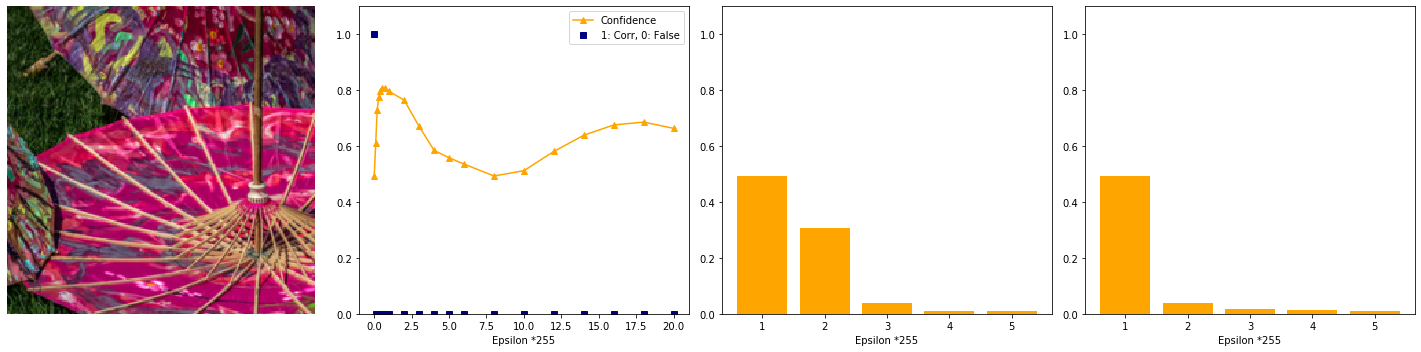

In [13]:
sample = 258
epsilon_conf = 8/255
analyze_bim_conf(sample, epsilon_conf, save_plot=True)

# Confidence up to 94% for wrong class at epsilon=8

## Some old stuff!!!!!

Epsilon 	 Accuracy 	 Confidence 	 Label
0			1	0.9999355	barrel, cask
0.1			1	0.999767	barrel, cask
0.2			1	0.99909234	barrel, cask
0.3			1	0.99703383	barrel, cask
0.4			1	0.99310356	barrel, cask
0.5			1	0.98853755	barrel, cask
0.7			1	0.97121596	barrel, cask
1.0			1	0.9499181	barrel, cask
2.0			1	0.9599582	barrel, cask
3.0			1	0.9892208	barrel, cask
4.0			1	0.9529559	barrel, cask
5.0			1	0.83578336	barrel, cask
6.0			1	0.8285601	barrel, cask
8.0			1	0.7247472	barrel, cask
10.0			1	0.47900546	barrel, cask
12.0			1	0.72902167	barrel, cask
14.0			1	0.52684313	barrel, cask
16.0			0	0.21468204	lumbermill, sawmill
18.0			0	0.124735184	lumbermill, sawmill
22.0			0	0.13377748	lumbermill, sawmill
26.0			0	0.28896436	honeycomb
32.0			0	0.81656784	honeycomb
40.0			0	0.53247404	brain coral


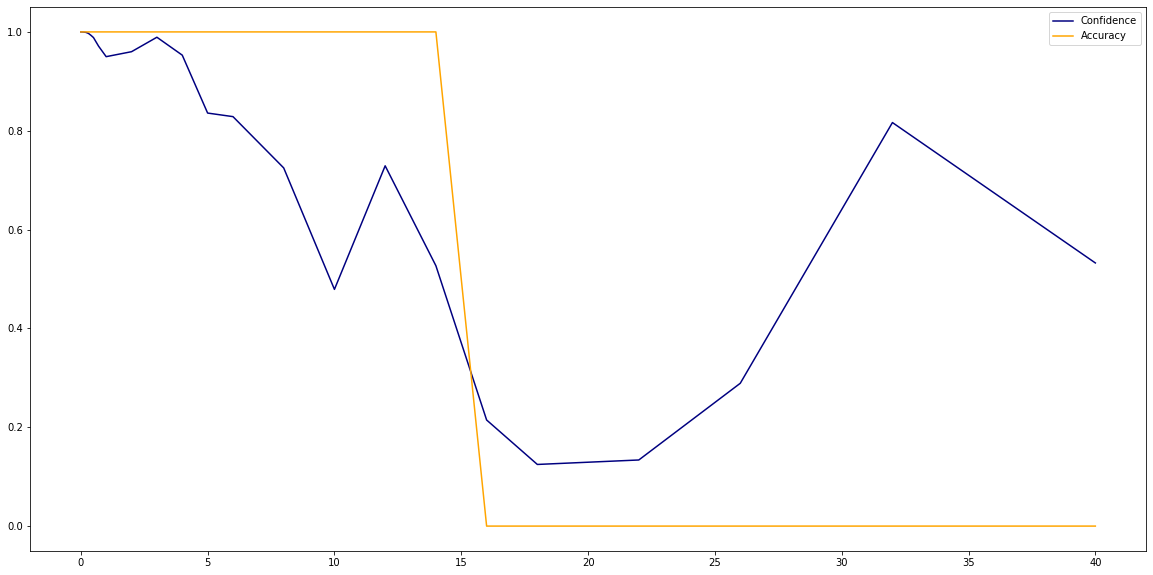

In [98]:
iterate_epsilons(766)

Epsilon 	 Accuracy 	 Confidence 	 Label
0			1	0.9999355	barrel, cask
0.1			1	0.9997663	barrel, cask
0.2			1	0.9991203	barrel, cask
0.3			1	0.9973918	barrel, cask
0.4			1	0.9938798	barrel, cask
0.5			1	0.98826796	barrel, cask
0.7			1	0.95988446	barrel, cask
1.0			1	0.9368711	barrel, cask
2.0			1	0.85285	barrel, cask
3.0			1	0.42362154	barrel, cask
4.0			1	0.32486832	barrel, cask
5.0			1	0.587586	barrel, cask
6.0			1	0.23409425	barrel, cask
8.0			0	0.093663804	lumbermill, sawmill
10.0			0	0.10282399	lumbermill, sawmill
12.0			0	0.21646465	lumbermill, sawmill
14.0			0	0.098761804	lumbermill, sawmill
16.0			0	0.17943078	lumbermill, sawmill
18.0			0	0.10978956	lumbermill, sawmill
22.0			0	0.14064844	boa constrictor, Constrictor constrictor
26.0			0	0.14764187	honeycomb
32.0			0	0.8395479	honeycomb
40.0			0	0.094081685	tarantula


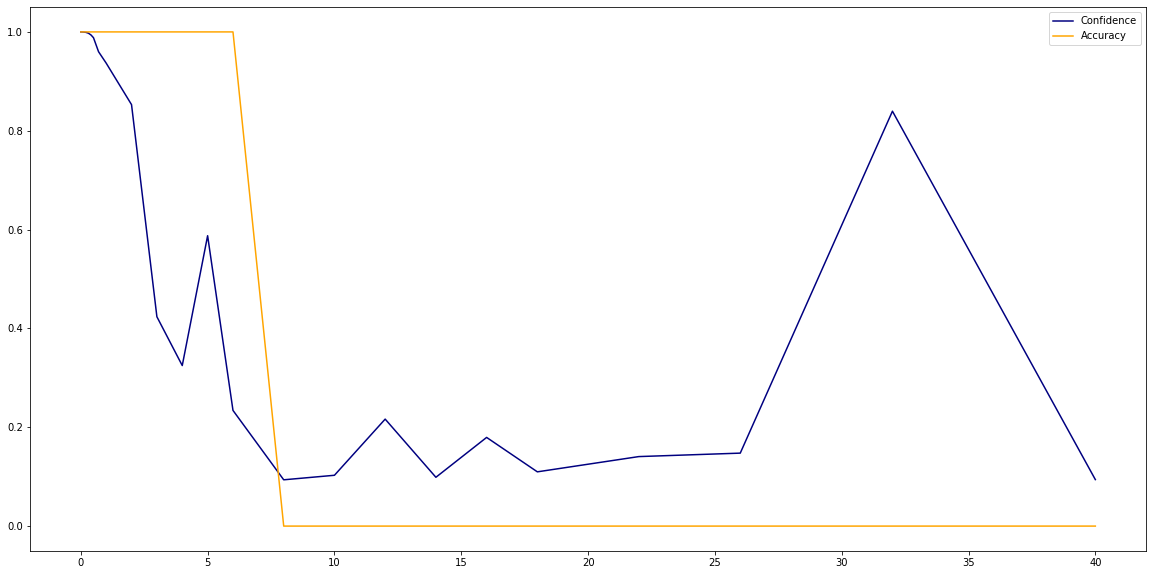

In [102]:
iterate_epsilons(766)

Epsilon 	 Accuracy 	 Confidence 	 Label
2.5500000000000003			1	0.58938587	dial telephone, dial phone
0.1			1	0.9988556	dial telephone, dial phone
0.2			1	0.9970053	dial telephone, dial phone
0.3			1	0.9936346	dial telephone, dial phone
0.4			1	0.9883478	dial telephone, dial phone
0.5			1	0.9809203	dial telephone, dial phone
0.7			1	0.959067	dial telephone, dial phone
1.0			1	0.90892076	dial telephone, dial phone
2.0			1	0.6984587	dial telephone, dial phone
3.0			1	0.52429956	dial telephone, dial phone
4.0			1	0.4055124	dial telephone, dial phone
5.0			1	0.35374087	dial telephone, dial phone
6.0			1	0.35036153	dial telephone, dial phone
8.0			1	0.33643234	dial telephone, dial phone
10.0			1	0.30700144	dial telephone, dial phone
12.0			0	0.2909409	spindle
14.0			0	0.32932037	spindle
16.0			0	0.27878878	spindle
18.0			0	0.20404696	spindle
22.0			0	0.14253508	spindle
26.0			0	0.09459376	spindle
32.0			0	0.04435969	spindle
40.0			0	0.02793514	scorpion


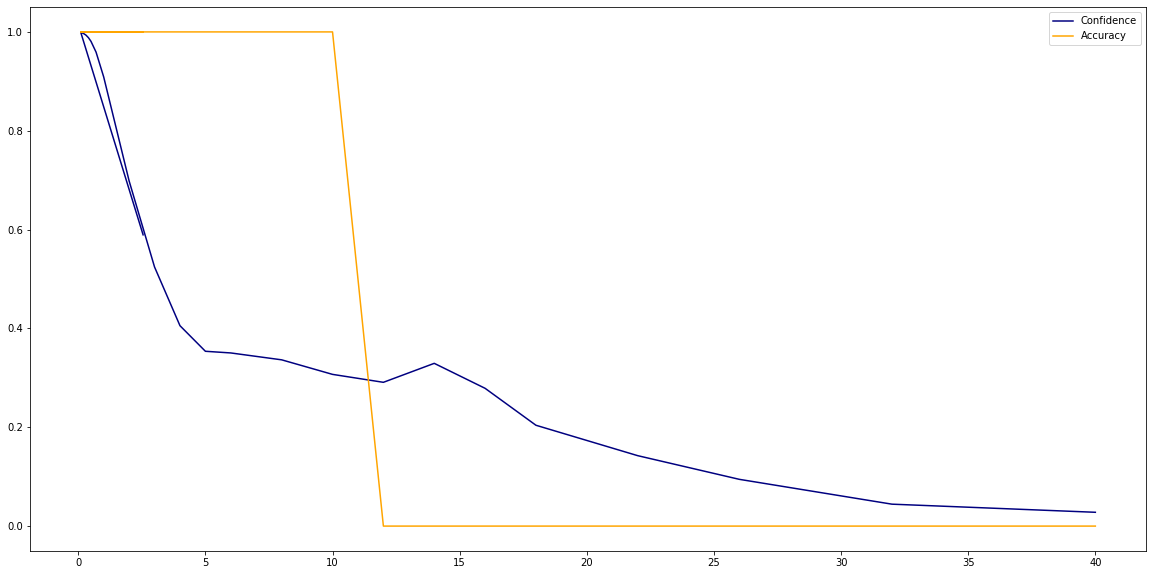

In [47]:
iterate_epsilons(590)

Epsilon 	 Accuracy 	 Confidence 	 Label
0			1	0.9984958	honeycomb
0.1			1	0.99721515	honeycomb
0.2			1	0.9936559	honeycomb
0.3			1	0.98548675	honeycomb
0.4			1	0.9702776	honeycomb
0.5			1	0.94641435	honeycomb
0.7			1	0.87577116	honeycomb
1.0			1	0.7662984	honeycomb
2.0			1	0.6421063	honeycomb
3.0			1	0.6387259	honeycomb
4.0			1	0.63160247	honeycomb
5.0			1	0.64614445	honeycomb
6.0			1	0.68201077	honeycomb
8.0			1	0.80579555	honeycomb
10.0			1	0.9198083	honeycomb
12.0			1	0.9653693	honeycomb
14.0			1	0.9822119	honeycomb
16.0			1	0.9883703	honeycomb
18.0			1	0.99088913	honeycomb
22.0			1	0.99439573	honeycomb
26.0			1	0.99641454	honeycomb
32.0			1	0.99756575	honeycomb
40.0			1	0.997715	honeycomb


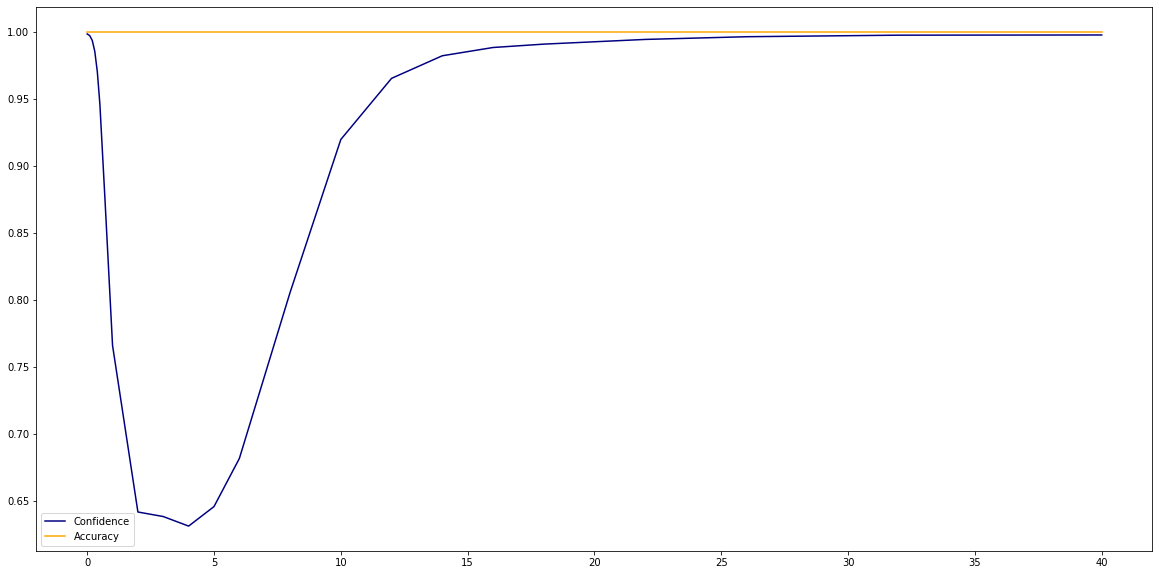

In [75]:
iterate_epsilons(132)

Epsilon 	 Accuracy 	 Confidence 	 Label
0			1	0.9978678	baseball
0.1			1	0.99073595	baseball
0.2			1	0.9740122	baseball
0.3			1	0.9442655	baseball
0.4			1	0.8999622	baseball
0.5			1	0.8442669	baseball
0.7			1	0.726144	baseball
1.0			1	0.58897096	baseball
2.0			1	0.35198572	baseball
3.0			1	0.24360058	baseball
4.0			1	0.18754263	baseball
5.0			1	0.15972885	baseball
6.0			1	0.14501931	baseball
8.0			1	0.11653368	baseball
10.0			1	0.13254663	baseball
12.0			1	0.16315761	baseball
14.0			1	0.19640179	baseball
16.0			1	0.2417866	baseball
18.0			1	0.2595709	baseball
22.0			1	0.2806484	baseball
26.0			1	0.24594808	baseball
32.0			1	0.18234633	baseball
40.0			0	0.21733066	poncho


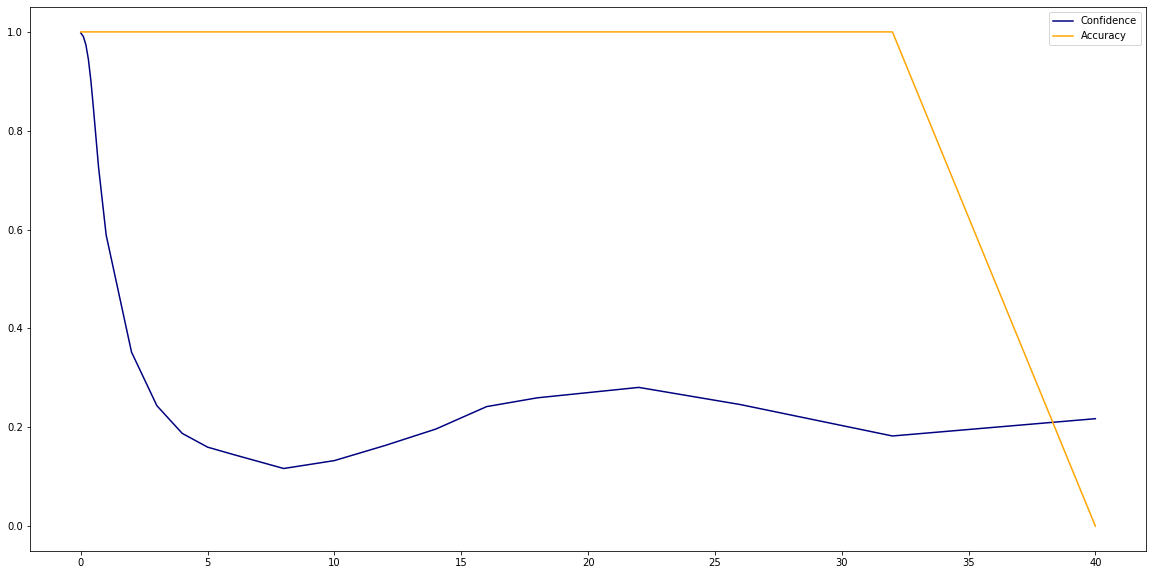

In [76]:
iterate_epsilons(241)

### 2.2 All Images

We now run attacks with the whole dataset for different values of $\epsilon$. We will first, make predictions on clean images. Only if this prediction is correct we craft an adversarial example and attack the network. The networks accuracy on the clean dataset is $???$ as shown in the notebook `00_Helper-Functions`.

#### Comparison paper p.5
FGSM vs. BIM when including false initial predictions.

In [4]:
## Part 1 -> MAC -> Done
epsilons = [0, 1/255, 2/255, 4/255, 8/255]

alpha = 1/255 # recommended in paper
filename_ext = "0-8"

top1, top5, conf = compute_all_bim(model, data_loader, predict, mean, std, epsilons, alpha, filename_ext)

Running epsilon: 8.00
Sample: 999 of 1000
Number of iterations: 10


In [ ]:
## Part 2 -> HP
epsilons = [16/255, 32/255, 48/255]

alpha = 1/255 # recommended in paper
filename_ext = "16-48"

top1, top5, conf = compute_all_bim(model, data_loader, predict, mean, std, epsilons, alpha, filename_ext)

In [ ]:
## Part 3 -> Colab
epsilons = [64/255, 96/255]

alpha = 1/255 # recommended in paper
filename_ext = "64-96"

top1, top5, conf = compute_all_bim(model, data_loader, predict, mean, std, epsilons, alpha, filename_ext)

In [ ]:
## Part 4 -> HP
epsilons = [128/255]

alpha = 1/255 # recommended in paper
filename_ext = "128-128"

top1, top5, conf = compute_all_bim(model, data_loader, predict, mean, std, epsilons, alpha, filename_ext)

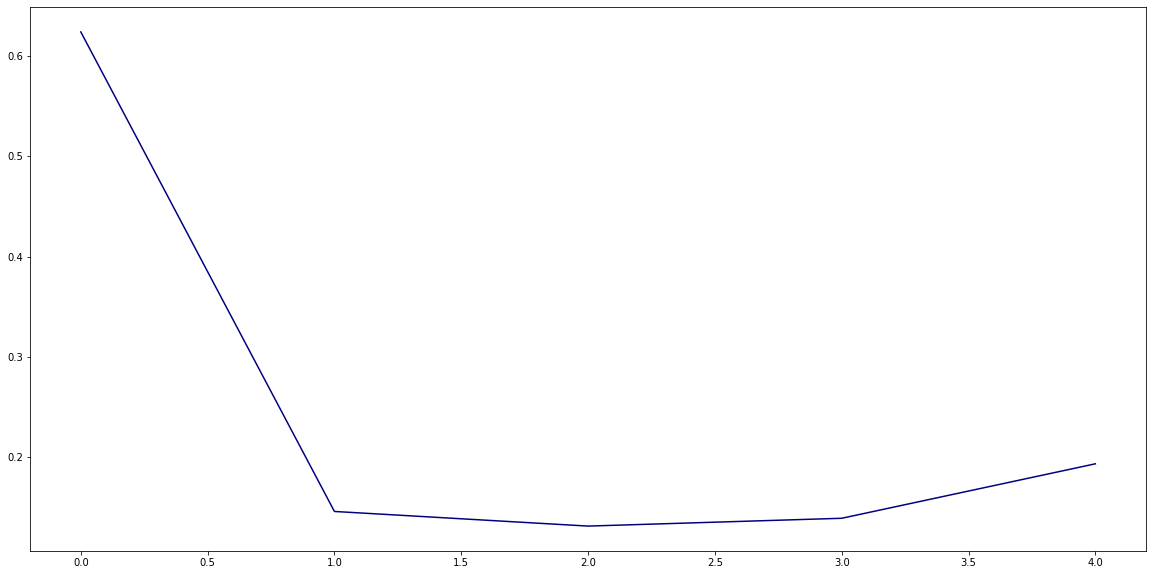

In [6]:
plt.plot(conf, color='navy')

In [5]:
epsilons = [0, 1/255, 2/255, 4/255, 8/255, 16/255, 32/255, 48/255, 64/255, 96/255, 128/255]
top1, top5, conf = compute_all_bim(model, data_loader, predict, mean, std, epsilons)

Running epsilon: 128.00
Sample: 999 of 1000


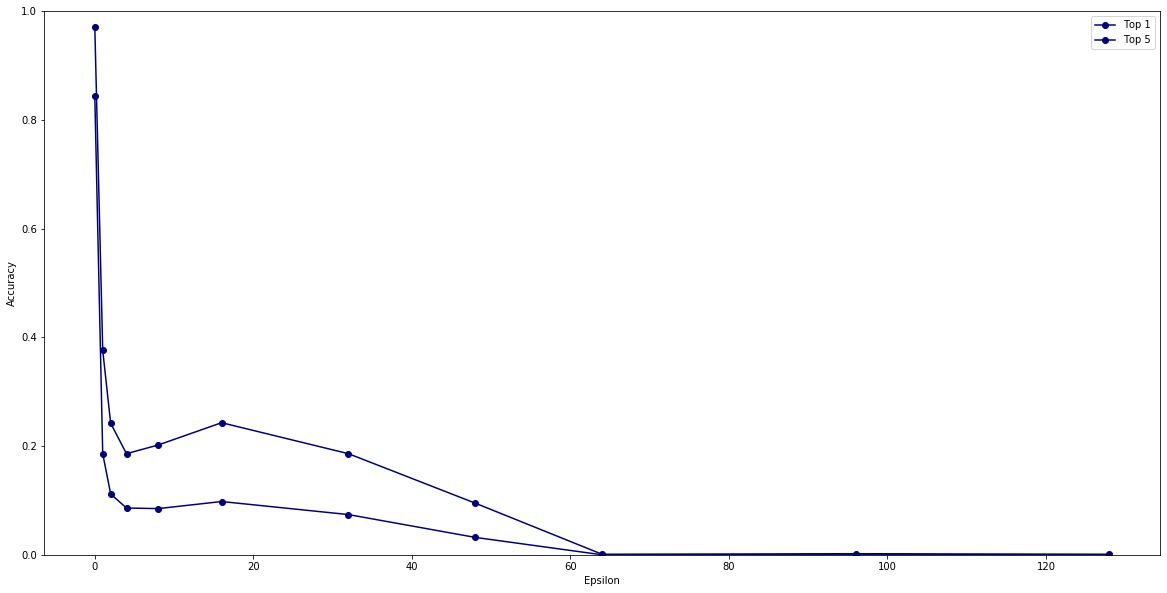

In [13]:
plt.plot(np.array(epsilons)*255, top1, "-o", color='navy', label='Top 1')
plt.plot(np.array(epsilons)*255, top5, "-o", color='navy', label='Top 5')
plt.ylim(0, 1)
plt.legend()
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

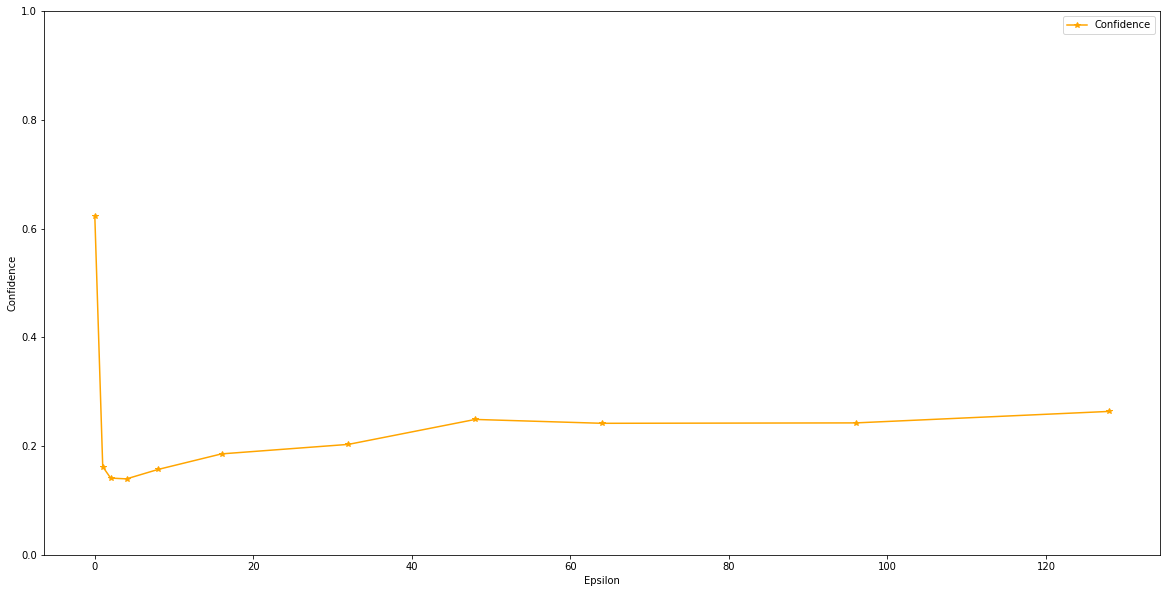

In [14]:
plt.plot(np.array(epsilons)*255, conf, "-*", color='orange', label='Confidence')
plt.ylim(0, 1)
plt.legend()
plt.xlabel("Epsilon")
plt.ylabel("Confidence")
plt.show()

## Comparison: FGSM BIM and ILLM

In [25]:
fgsm = pd.read_csv("results/FGSM/FGSM-all_samples.csv", index_col=0)
bim = pd.read_csv("results/BIM/BIM-all_samples.csv", index_col=0)
bim

,Epsilon,Top1,Top5,Confidence
0,0.0,0.844,0.971,0.623875
1,1.0,0.186,0.376,0.162146
2,2.0,0.112,0.242,0.141116
3,4.0,0.086,0.186,0.139667
4,8.0,0.085,0.202,0.157074
5,16.0,0.098,0.243,0.185662
6,32.0,0.074,0.186,0.203129
7,48.0,0.032,0.095,0.249020
8,64.0,0.000,0.001,0.241899
9,96.0,0.000,0.002,0.242641


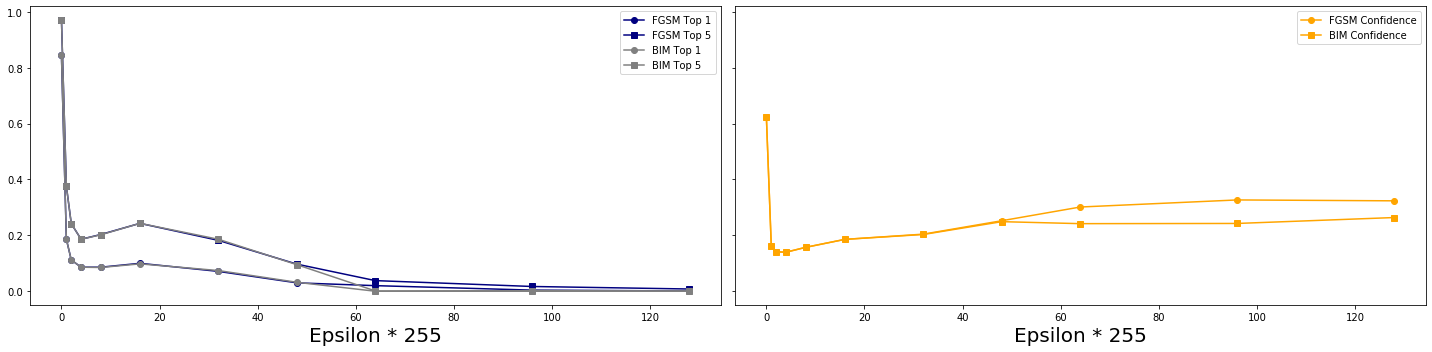

In [24]:
# Plot
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,5))

## Left: Accuracies
axs[0].plot(fgsm["Epsilon"], fgsm["Top1"], "-o", color='navy', label='FGSM Top 1')
axs[0].plot(fgsm["Epsilon"], fgsm["Top5"], "-s", color='navy', label='FGSM Top 5')
axs[0].plot(bim["Epsilon"], bim["Top1"], "-o", color='grey', label='BIM Top 1')
axs[0].plot(bim["Epsilon"], bim["Top5"], "-s", color='grey', label='BIM Top 5')
axs[0].legend()
axs[0].set_xlabel("Epsilon * 255", fontsize=20)

## Right: Confidences
axs[1].plot(fgsm["Epsilon"], fgsm["Confidence"], "-o", color='orange', label='FGSM Confidence')
axs[1].plot(bim["Epsilon"], bim["Confidence"], "-s", color='orange', label='BIM Confidence')

axs[1].legend()
axs[1].set_xlabel("Epsilon * 255", fontsize=20)

## Save plot
fig.tight_layout()
#fig.savefig("plots/Compare-attacks.pdf")
#fig.savefig("plots/Compare-attacks.png")

## References

[1] &emsp; Goodfellow et al. (2015) *Explaining and Harnessing Adversarial Examples*